In [1]:
import sys
sys.path.append("../../library/")
sys.path.append("../lib/")
import numpy as np
import matplotlib.pyplot as plt
import read_data as rd
from scipy.optimize import minimize_scalar
from sub_plot import *
from defaultPlot import *
from dataProcess import *
from stringFormat import *


# Read Data

In [3]:
time = {}
points = {}
#* ---------------------------------------------------------
orderParameter = {}
meanClusterSize = {}
orderParameterVariance = {}
interEventTime = {}
dynamics = {}
periodDynamics = {}
#* ---------------------------------------------------------
ageDist = {}
interEventTimeDist = {}
deltaUpperBoundDist = {}
#* ---------------------------------------------------------
orderParameterDist_t = {}
orderParameterDist = {}
clusterSizeDist_op = {}
clusterSizeDist = {}
#* ---------------------------------------------------------
interEventTime_orderParameter = {}

In [4]:
# for networkSize in networkSizeList:
for networkSize in [10240000]:
    time[networkSize] = np.arange(0.0, 1.0, 1/networkSize)
    # for acceptanceThreshold in acceptanceThresholdList:
    for acceptanceThreshold in [0.5]:
        current = networkSize, acceptanceThreshold
        points[current] = rd.readPoints(networkSize, acceptanceThreshold)
        #* -------------------------------------------------------
        # orderParameter[current] = rd.read("orderParameter", networkSize, acceptanceThreshold)
        # meanClusterSize[current] = rd.read("meanClusterSize", networkSize, acceptanceThreshold)
        # orderParameterVariance[current] = rd.read("orderParameterVariance", networkSize, acceptanceThreshold)
        # interEventTime[current] = rd.read("interEventTime", networkSize, acceptanceThreshold)
        dynamics[current] = rd.read("dynamics", networkSize, acceptanceThreshold)
        periodDynamics[current] = rd.read("periodDynamics", networkSize, acceptanceThreshold)
        # #* ---------------------------------------------------------
        # for state in rd.states:
        #     ageDist[current, state] = rd.read("ageDist/" + state, networkSize, acceptanceThreshold)
        #     interEventTimeDist[current, state] = rd.read("interEventTimeDist/" + state, networkSize, acceptanceThreshold)
        #     deltaUpperBoundDist[current, state] = rd.read("deltaUpperBoundDist/" + state, networkSize, acceptanceThreshold)
        #* ---------------------------------------------------------
        # orderParameterDist_t[current] = rd.extractRepeater("orderParameterDist", networkSize, acceptanceThreshold)
        # for t in orderParameterDist_t[current]:
        #     orderParameterDist[current, t] = rd.read("orderParameterDist", networkSize, acceptanceThreshold, t)
        # clusterSizeDist_op[current] = rd.extractRepeater("clusterSizeDist", networkSize, acceptanceThreshold)
        # for op in clusterSizeDist_op[current]:
        #     clusterSizeDist[current, op] = rd.read("clusterSizeDist", networkSize, acceptanceThreshold, op)
        #* ---------------------------------------------------------
        # interEventTime_orderParameter = rd.read("interEventTime_orderParameter", networkSize, acceptanceThreshold)

# Dynamics

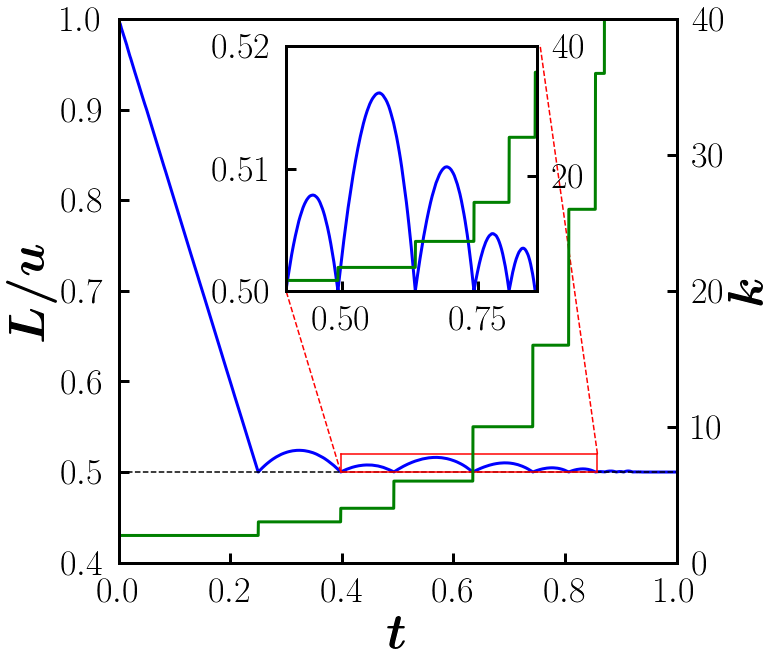

In [74]:
fig, ax = plt.subplots()

current = networkSize, acceptanceThreshold = 10240000, 0.5
u, L, m, k = dynamics[current]
a = L/u
L = L/networkSize

#* --------------------- main blue line -----------------------
bin_L, bin_a = avgLinBin(L, a)
ax.plot(bin_L, bin_a, 'b-', linewidth=3)
ax.set_ylim(acceptanceThreshold-0.1, 1.0)
ax.plot([0,1], [acceptanceThreshold, acceptanceThreshold], 'k--')
ax.set_ylabel(latex_bold_string("L/u"))
ax.set_xlabel(latex_bold_string("t"))
ax.set_xlim([0, 1])

#* --------------------- main red line -----------------------
ax1 = ax.twinx()
bin_L, bin_k = avgLinBin(L, k)
ax1.plot(bin_L, bin_k, 'g-', linewidth=3)
ax1.set_ylim([0, 40])
ax1.set_ylabel(latex_bold_string("k"))


#* --------------------- line to inset -----------------------
x1 = 0.398
x2 = 0.858
x1_index = np.argmax(L>x1)
x2_index = np.argmax(L>x2)
ax.plot([x1, 0.3], [0.5, 0.7], 'r--')
ax.plot([x2, 0.755], [0.52, 0.972], 'r--')

ax.plot([x1, x1], [0.5, 0.52], 'r-')
ax.plot([x2, x2], [0.5, 0.52], 'r-')
ax.plot([x1, x2], [0.5, 0.5], 'r-')
ax.plot([x1, x2], [0.52, 0.52], 'r-')


#* --------------------- inset blue line -----------------------
ax2 = ax.inset_axes([0.3, 0.5, 0.45, 0.45])
bin_L, bin_a = avgLinBin(L[x1_index : x2_index], a[x1_index : x2_index])
ax2.plot(bin_L, bin_a, 'b-', linewidth=3)
ax2.set_ylim(0.5, 0.52)
ax2.set_xlim(bin_L[0], bin_L[-1])

#* --------------------- inset red line -----------------------
ax3 = ax2.twinx()
bin_L, bin_k = avgLinBin(L[x1_index : x2_index], k[x1_index : x2_index])
ax3.plot(bin_L, bin_k, 'g-', linewidth=3)
ax3.set_ylim(top=40)

# fig.savefig("../fig/dynamics(N{:.1e}G{:.1f}).png".format(*current))
fig.show()



# Period Dynamics

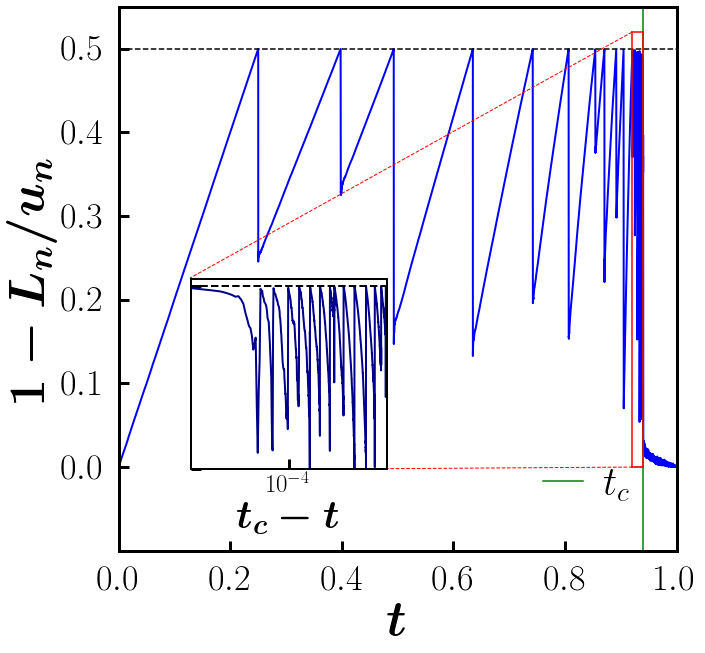

In [73]:
fig, ax = plt.subplots()

current = networkSize, acceptanceThreshold = 10240000, 0.5
t_c = points[current]["t_c"] + 0.000148
t_b = points[current]["t_b"]

u, L = periodDynamics[current]
a = L / u
t = np.arange(0, len(a), 1) / networkSize
bin_t, bin_a= avgLinBin(t, a, delta=7e-5)
ax.plot(bin_t, 1-bin_a, 'b-', linewidth=2)
ax.plot([0, 1], [(1-acceptanceThreshold), (1-acceptanceThreshold)], 'k--')
ax.plot([t_c, t_c], [(1-acceptanceThreshold)+0.05, -0.1], 'g-', label=latex_string('t_c'))
ax.legend(loc='lower right', borderaxespad=0.8)

ax1 = ax.inset_axes([0.13, 0.15, 0.35, 0.35])
ax1.spines[:].set_linewidth(2)
reduced_t = t_c-t
reduced_t, a = avgLinBin(reduced_t[reduced_t>0], a[reduced_t>0], delta=1e-6)
ax1.plot(reduced_t, 1-a, linewidth=2, color='darkblue')
ax1.plot([0, 1], [(1-acceptanceThreshold), (1-acceptanceThreshold)], 'k--', linewidth=2)
ax1.set_xscale('log')
ax1.set_xlim(reduced_t[0], 2e-2)
# ax1.set_xlim(2e-2, reduced_t[0])
ax1.set_ylim([0, (1-acceptanceThreshold)+0.02])
ax1.tick_params(axis='x', labelsize=25, pad=5)
ax1.set_yticklabels([])
ax1.set_xlabel(latex_bold_string("t_c-t"), fontsize=40)

ax.plot([t_c-2e-2, t_c], [(1-acceptanceThreshold)+0.02, (1-acceptanceThreshold)+0.02], 'r-')
ax.plot([t_c-2e-2, t_c-2e-2], [(1-acceptanceThreshold)+0.02, 0], 'r-')
ax.plot([t_c, t_c], [(1-acceptanceThreshold)+0.02, 0], 'r-')
ax.plot([t_c-2e-2, t_c], [0, 0], 'r-')

ax.plot([t_c-2e-2, 0.128], [(1-acceptanceThreshold)+0.02, 0.226], 'r--', linewidth=1)
ax.plot([t_c, 0.48], [0, -0.002], 'r--', linewidth=1)

ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
ax.set_xlabel(latex_bold_string("t"))
ax.set_ylabel(latex_bold_string("1-L_n/u_n"))
ax.set_xlim([0, 1])
ax.set_ylim([-0.1, (1-acceptanceThreshold) + 0.05])


# ax1 = ax.twinx()
# ax1.set_ylabel("a")
# ax1.set_yticks([])


fig.savefig("../fig/periodDynamics(N{:.1e}G{:.1f})_log.png".format(*current))
fig.show()


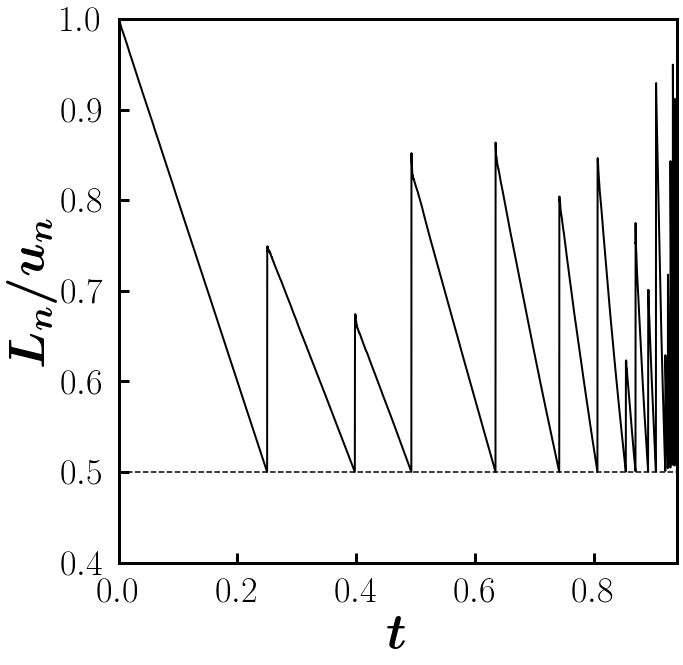

In [10]:
fig, ax = plt.subplots()

current = networkSize, acceptanceThreshold = 10240000, 0.5

u, L = periodDynamics[current]
a = L / u
t = np.arange(0, len(a), 1) / networkSize

t, a = avgLinBin(t, a, delta=1e-4)
ax.plot(t, a, 'k-', linewidth=2, markersize=2)
ax.plot([0, 1], [acceptanceThreshold, acceptanceThreshold], 'k--')


ax.set_xlabel(latex_bold_string("t"))
ax.set_ylabel(latex_bold_string("L_n/u_n"))
ax.set_xlim([0, points[current]["t_c"]])
ax.set_ylim([acceptanceThreshold - 0.1, 1])

# fig.savefig("../fig/periodDynamics(N{:.1e}G{:.1f}).pdf".format(*current))
fig.show()


# Power spectrum

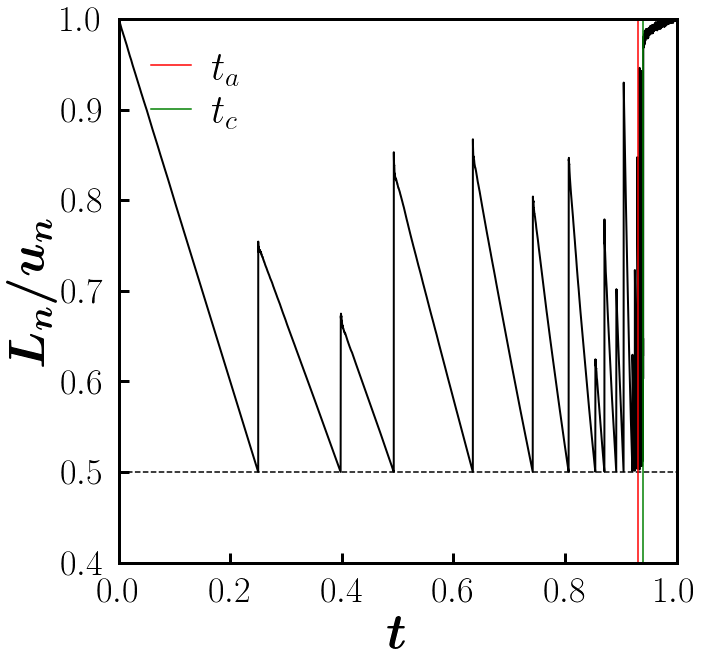

In [84]:
fig, ax = plt.subplots()

current = networkSize, acceptanceThreshold = 10240000, 0.5
t_a1 = points[current]["t_a1"]
t_c = points[current]["t_c"]
u, L = periodDynamics[current]
a = L / u
t = np.arange(0, len(a), 1) / networkSize

t, a = avgLinBin(t, a, delta=7e-5)
ax.plot(t, a, 'k-', linewidth=2, markersize=2)
ax.plot([0, 1], [acceptanceThreshold, acceptanceThreshold], 'k--')
ax.plot([t_a1, t_a1], [0.4, 1.0], 'r-', label=latex_string('t_a'))
ax.plot([t_c, t_c], [0.4, 1.0], 'g-', label=latex_string("t_c"))


ax.set_xlabel(latex_bold_string("t"))
ax.set_ylabel(latex_bold_string("L_n/u_n"))
ax.set_xlim([0, 1])
ax.set_ylim([acceptanceThreshold - 0.1, 1])
ax.legend(loc='upper left')

fig.show()


In [44]:
t_a1 = points[current]["t_a1"]
t_b = points[current]["t_b"]
#* sub critical
sub_num_data = t[:int(t_a1 * networkSize)].size
sub_freq = np.fft.fftfreq(sub_num_data, 1/networkSize)
fft = np.fft.fft(a[: int(t_a1 * networkSize)]) / sub_num_data
sub_power_spectrum = np.abs(fft) ** 2

sub_freq, sub_power_spectrum = sub_freq[1: int(sub_num_data/2)], sub_power_spectrum[1: int(sub_num_data/2)]

#* Super critical
sup_num_data = t[int(t_a1 * networkSize):int(t_b * networkSize)].size
sup_freq = np.fft.fftfreq(sup_num_data, 1/networkSize)
fft = np.fft.fft(a[int(t_a1 * networkSize):int(t_b * networkSize)]) / sup_num_data
sup_power_spectrum = np.abs(fft) ** 2

sup_freq, sup_power_spectrum = sup_freq[1: int(sup_num_data/2)], sup_power_spectrum[1: int(sup_num_data/2)]

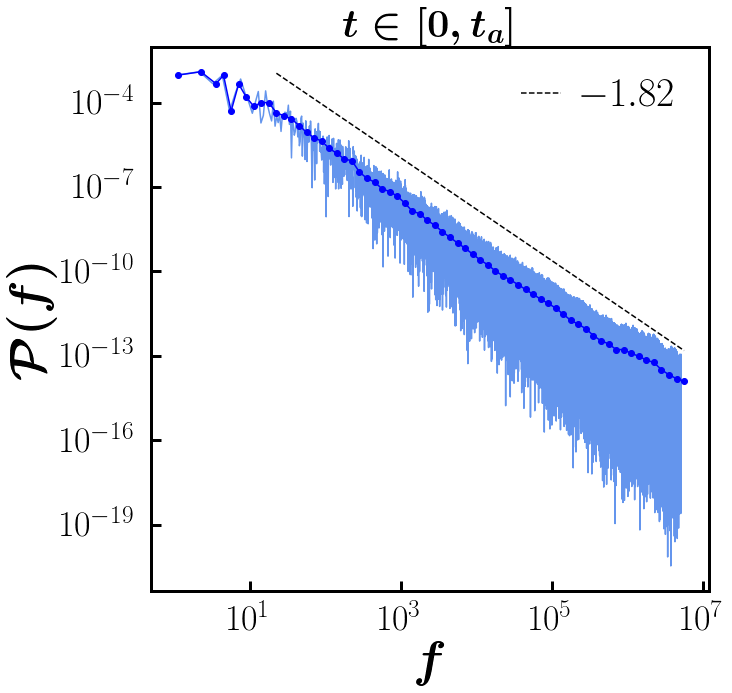

In [76]:
fig, ax = plt.subplots()

bin_freq, bin_ps = avgLogBin(sub_freq, sub_power_spectrum)
# fitX, fitY, slope, _ = logFit(sub_freq[30:], sub_power_spectrum[30:], offset=-2.5)
fitX, fitY, slope, _ = logFit(bin_freq[10:], bin_ps[10:], offset=-1.5)

ax.plot(sub_freq, sub_power_spectrum, color='cornflowerblue')
ax.plot(bin_freq, bin_ps, 'o-', color='blue')
ax.plot(fitX, fitY, 'k--', label=latex_float(slope, 2))

ax.legend(loc='best')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latex_bold_string("f"))
ax.set_ylabel(latex_bold_string("\mathcal{P} (f)"))
ax.set_title(latex_bold_string("t \in [0, t_a]"), fontsize=40)

fig.savefig("../fig/powerSpectrum_sub(N{:.1e}G{:.1f})_bin.png".format(*current))
fig.show()


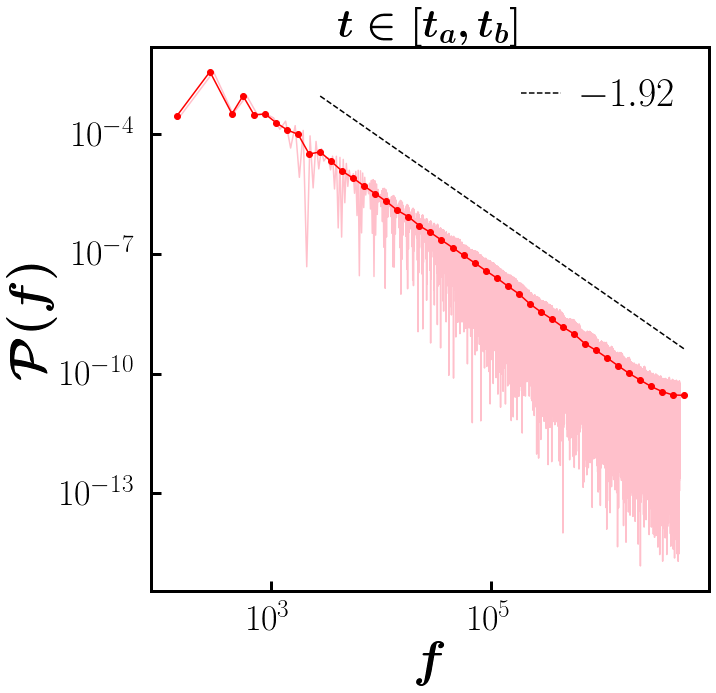

In [78]:
fig, ax = plt.subplots()

bin_freq, bin_ps = avgLogBin(sup_freq, sup_power_spectrum)
# fitX, fitY, slope, _ = logFit(sup_freq[30:], sup_power_spectrum[30:], offset=-2.0)
fitX, fitY, slope, _ = logFit(bin_freq[10:], bin_ps[10:], offset=-1.5)

ax.plot(sup_freq, sup_power_spectrum, color='pink')
ax.plot(bin_freq, bin_ps, 'o-', color='red')
ax.plot(fitX, fitY, 'k--', label=latex_float(slope, 2))

ax.legend(loc='best')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latex_bold_string("f"))
ax.set_ylabel(latex_bold_string("\mathcal{P} (f)"))
ax.set_title(latex_bold_string("t \in [t_a, t_b]"), fontsize=40)

fig.savefig("../fig/powerSpectrum_sup(N{:.1e}G{:.1f})_bin.png".format(*current))
fig.show()


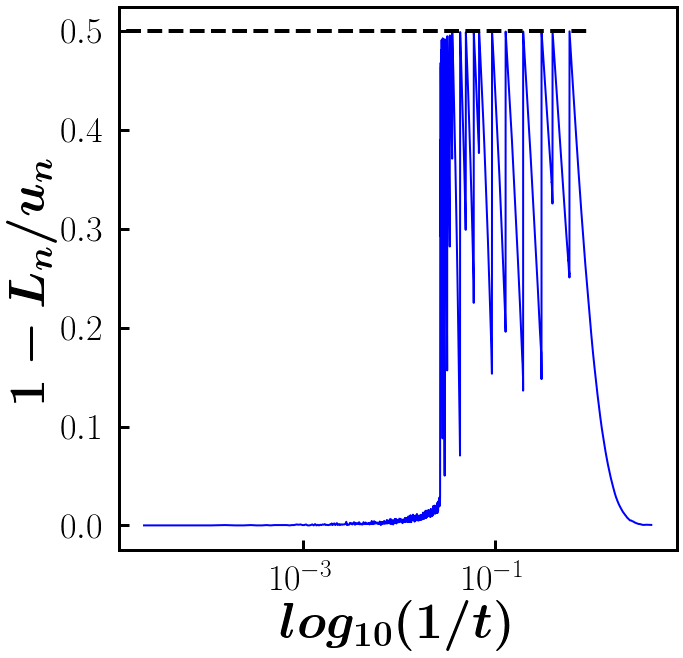

In [184]:
fig, ax = plt.subplots()

current = networkSize, acceptanceThreshold = 10240000, 0.5
t_c = points[current]["t_c"]
t_b = points[current]["t_b"]

u, L = periodDynamics[current]
a = L / u
t = np.arange(0, len(a), 1) / networkSize
t,a = avgLinBin(t,a,delta=1e-4)
ax.plot(np.log10(1/t), 1-a, 'b-', linewidth=2)
ax.plot([0, 1], [acceptanceThreshold, acceptanceThreshold], 'k--')
ax.set_xscale('log')

# ax1 = ax.twiny()
# ax1.plot(np.log10(t), 1-a, 'r-', linewidth=2)
# ax1.set_xscale('log', base=0.1)

ax.set_xlabel(latex_bold_string("log_{10}(1/t)"))
ax.set_ylabel(latex_bold_string("1-L_n/u_n"))
# ax.set_ylim([0, acceptanceThreshold + 0.1])
# ax.set_xlim([0,1])

# fig.savefig("../fig/1_periodDynamics(N{:.1e}G{:.1f})_log.pdf".format(*current))
fig.show()


In [28]:
t_c-points[current]["t_b"]

0.002834863281249933

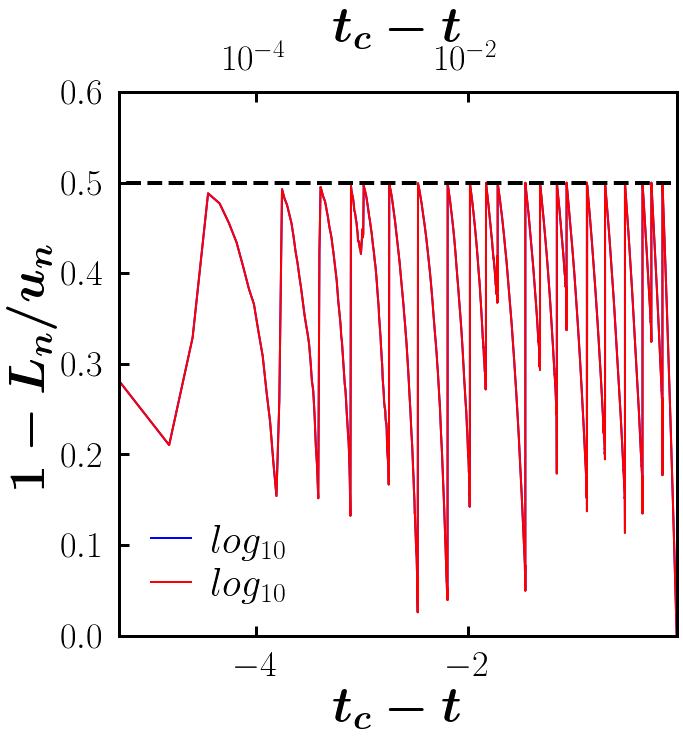

In [18]:
fig, ax = plt.subplots()

current = networkSize, acceptanceThreshold = 10240000, 0.5
t_c = points[current]["t_c"]

u, L = periodDynamics[current]
a = L / u
t = np.arange(0, len(a), 1) / networkSize
reduced_t = t_c-t
reduced_t, a = avgLinBin(reduced_t[reduced_t>0], a[reduced_t>0], delta=1e-5)

ax.plot(np.log10(reduced_t), 1-a, 'b-', linewidth=2, markersize=2, label=latex_string('log_{10}'))
ax.set_xlabel(latex_bold_string("t_c-t"))
ax.set_ylabel(latex_bold_string("1-L_n/u_n"))
ax.set_xlim(np.log10(reduced_t[0]), np.log10(reduced_t[-1]))
ax.set_ylim([0, acceptanceThreshold + 0.1])

ax1 = ax.twiny()
ax1.plot(reduced_t, 1-a, 'r-', linewidth=2, markersize=2, label=latex_string('log_{10}'))
ax1.plot([0, 1], [acceptanceThreshold, acceptanceThreshold], 'k--')
ax1.set_xlabel(latex_bold_string("t_c-t"))
ax1.set_xlim(reduced_t[0], reduced_t[-1])
ax1.set_xscale('log', base=10)

fig.legend(loc='lower left', bbox_to_anchor=(0,0), bbox_transform=ax.transAxes)


# fig.savefig("../fig/1_periodDynamics(N{:.1e}G{:.1f})_log.pdf".format(*current))
fig.show()


In [13]:
reduced_t[0]

5e-06

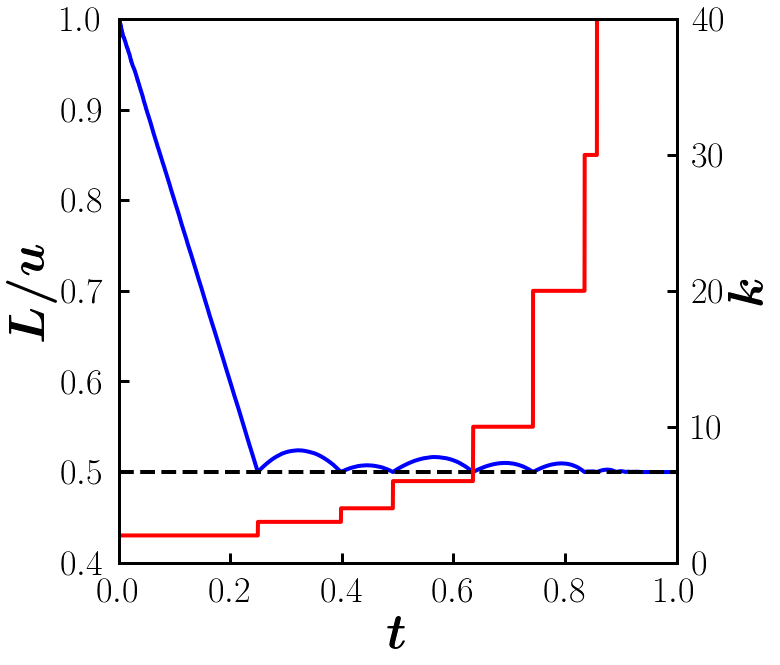

In [48]:
fig, ax = plt.subplots()

current = networkSize, acceptanceThreshold = 1280000, 0.5
u, L, m, k = dynamics[current]
a = L/u
L = L/networkSize

bin_L, bin_a = avgLinBin(L, a)
ax.plot(bin_L, bin_a, 'b-')
ax.set_ylim(acceptanceThreshold-0.1, 1.0)
ax.plot([0,1], [acceptanceThreshold, acceptanceThreshold], 'k--')
ax.set_ylabel(latex_bold_string("L/u"))

ax1 = ax.twinx()
bin_L, bin_k = avgLinBin(L, k)
ax1.plot(bin_L, bin_k, 'r-')
ax1.set_ylim([0, 40])
ax1.set_ylabel(latex_bold_string("k"))

ax.set_xlabel(latex_bold_string("t"))
ax.set_xlim([0, 1])

fig.show()



# Finding t_a2,m_a2

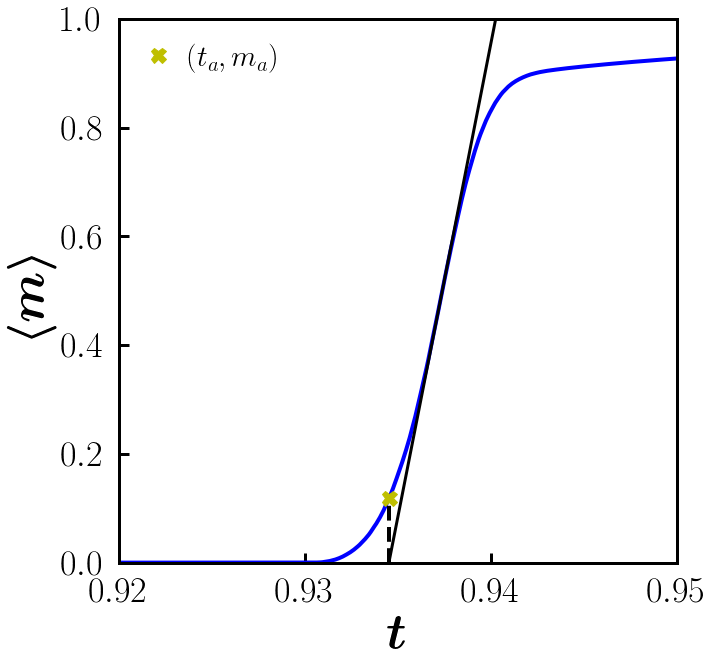

In [13]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

networkSize = 10240000
acceptanceThreshold = 0.5
current = networkSize, acceptanceThreshold

t, op = avgLinBin(time[networkSize], orderParameter[current])
ax.plot(t, op, 'b-')
t_a2, m_a2, t_inflection, m_inflection = rd.get_ta_inflection(networkSize, orderParameter[current])
a = m_inflection/(t_inflection-t_a2)
ax.plot([t_a2, t_inflection + (1-m_inflection)/a], [0, 1], 'k-', linewidth=3)
ax.plot([t_a2,t_a2], [0, m_a2], 'k--')
ax.plot(t_a2, m_a2, 'yX', label=latex_string("(t_a, m_a)"))

ax.set_xlim(chi_plotRange[acceptanceThreshold])
ax.set_ylim([0, 1])
ax.set_xlabel(latex_bold_string("t"))
ax.set_ylabel(latex_bold_string("\langle m \\rangle"))
ax.legend(loc="upper left", fontsize=30)

# fig.savefig("../data/mBFW/fig/t_op(N{:.1e},G{:.1f}).pdf".format(*current), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
plt.show()


In [16]:
print(t_a2,m_a2,t_inflection, m_inflection)
with open("../data/mBFW/points/" + "N{:.1e},G{:.1f}".format(*current) + ".txt", 'a') as file:
    file.write("t_a2: " + str(t_a2) + "\n")
    file.write("m_a2: " + str(m_a2) + "\n")
    file.write("t_inflection: " + str(t_inflection) + "\n")
    file.write("m_inflection: " + str(m_inflection) + "\n")

0.9345275441249807 0.1180556139082032 0.93735 0.4915863611753153


# Finding t_c, m_c

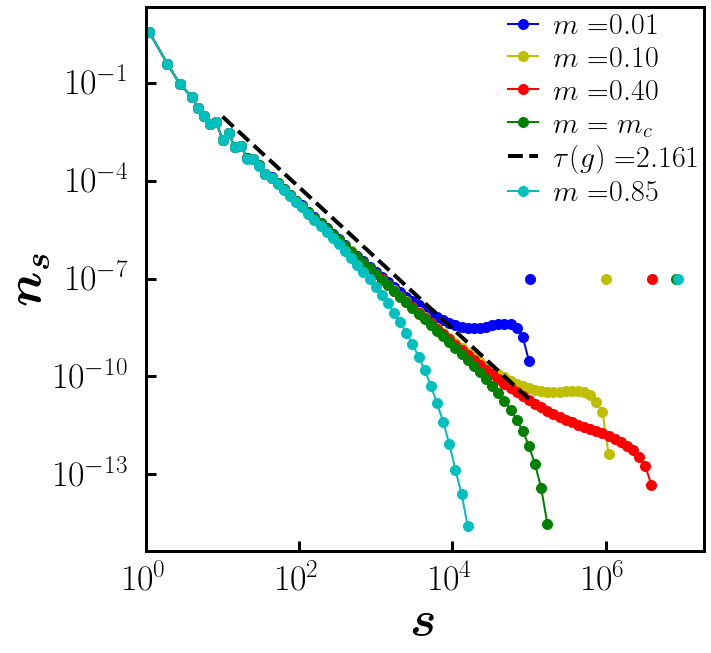

In [16]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

networkSize = 10240000
acceptanceThreshold = 0.5
current = networkSize, acceptanceThreshold
fitRange = [25, 45]

def plotCSD(op, label=None, color=None, fit=False):
    csd, dist = distLogBin(*clusterSizeDist[current, op], delta_exponent=0.08)
    label_name = label if label else latex_string("m=") + latex_float(op, 2)
    color_name = color if color else next(ax._get_lines.prop_cycler)['color']
    ax.plot(csd, dist, 'o-', label=label_name, color=color_name, markersize=10, linewidth=2)
    ax.plot(op * networkSize, 1 / networkSize, 'o', color=color_name, markersize=10)

    fitX, fitY, tau, _ = logFit(csd[fitRange[0]: fitRange[1]], dist[fitRange[0]: fitRange[1]], offset=-0.5, start=10, end=1e5)
    if fit:
        ax.plot(fitX, fitY, 'k--', label=latex_string("\\tau(g)=") + latex_float(-tau, 3))
    # ax.plot(csd, dist, 'o-', label="m={:.3f}".format(op) + ", r={:.3e}".format(residual[0]), markersize=5, linewidth=2)

plotCSD(0.01, color='b')
plotCSD(0.10, color='y')
plotCSD(0.40, color='r')
plotCSD(0.8170, latex_string("m=m_c"), color='g', fit=True)
plotCSD(0.850, color='c')


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(left=1)
ax.set_xlabel(latex_bold_string("s"))
ax.set_ylabel(latex_bold_string("n_s"))
ax.legend(loc='best', borderpad=0.1, borderaxespad=0.1, fontsize=30)

# fig.savefig("../data/mBFW/fig/csd(N{:.1e},G{:.1f}).pdf".format(*current), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
fig.show()



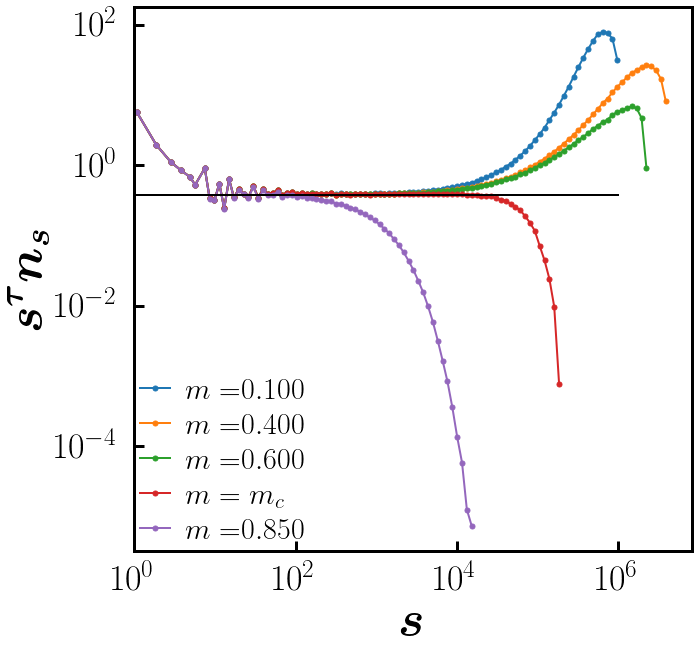

In [44]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

networkSize = 10240000
acceptanceThreshold = 0.5
current = networkSize, acceptanceThreshold
tau = 2.15

def plotCSD_tau(op):
    csd, dist = distLogBin(*clusterSizeDist[current, op], delta_exponent=0.06)
    dist *= np.power(csd, tau)
    if op == points[current]["m_c"]:
        ax.plot(csd, dist, 'o-', label=latex_string("m=m_c"), markersize=5, linewidth=2)
    else:
        ax.plot(csd, dist, 'o-', label=latex_string("m=") + latex_float(op, 3), markersize=5, linewidth=2)
y = 3.8e-1

plotCSD_tau(0.10)
plotCSD_tau(0.40)
plotCSD_tau(0.60)
plotCSD_tau(0.814)
plotCSD_tau(0.85)
ax.plot([1,1e6], [y,y], 'k-', linewidth=2)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(left=1)
ax.set_xlabel(latex_bold_string("s"))
ax.set_ylabel(latex_bold_string("s^\\tau n_s"))
# ax.set_xlim([1, networkSize/20])
# ax.set_ylim([3e-1,6e-1])
ax.legend(loc='best', borderpad=0.1, borderaxespad=0.1, fontsize=30)

# fig.savefig("../data/mBFW/fig/csd_tau(N{:.1e},G{:.1f}).pdf".format(*current), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
fig.show()


In [140]:
networkSize = 20000
acceptanceThreshold = 0.9
current = networkSize, acceptanceThreshold
m_c = 0.420
t_c = rd.op2t(orderParameter[current], m_c)/networkSize
print(t_c, m_c)
# with open("../data/mBFW/points/" + "N{:.1e},G{:.1f}".format(*current) + ".txt", 'a') as file:
#     file.write("t_c_csd: " + str(t_c) + "\n")
#     file.write("m_c_csd: " + str(m_c) + "\n")
    # file.write("tau: " + str(tau) + "\n")

0.71835 0.42


# Find characteristic size s^* and t_g,m_g

In [6]:
networkSize = 10240000
acceptanceThreshold = 0.5
current = networkSize, acceptanceThreshold
tau = 2.15
char_size = {}
char_dist = {}
for op in orderParameter_clusterSizeDist[current]:
    csd, dist = distLogBin(*clusterSizeDist[current, op], delta_exponent=0.08)
    dist *= np.power(csd, tau)
    start, window = 20,4
    try:
        max_index = np.argmax(dist[start:])+start
    except ValueError:
        char_size[op] = 1
        char_dist[op] = 1
        continue
    fit_csd = np.log10(csd[max_index-window : max_index+2])
    fit_dist = np.log10(dist[max_index-window : max_index+2])
    poly = np.poly1d(np.polyfit(fit_csd, fit_dist, 4))
    s_star = minimize_scalar(-poly, bounds=[fit_csd[0], fit_csd[-1]], method='bounded')
    s_star = np.power(10.0, s_star.x)
    char_size[op] = s_star
    char_dist[op] = np.power(10.0, poly(np.log10(s_star)))

tList = rd.opList2tList(orderParameter[current], orderParameter_clusterSizeDist[current])/networkSize


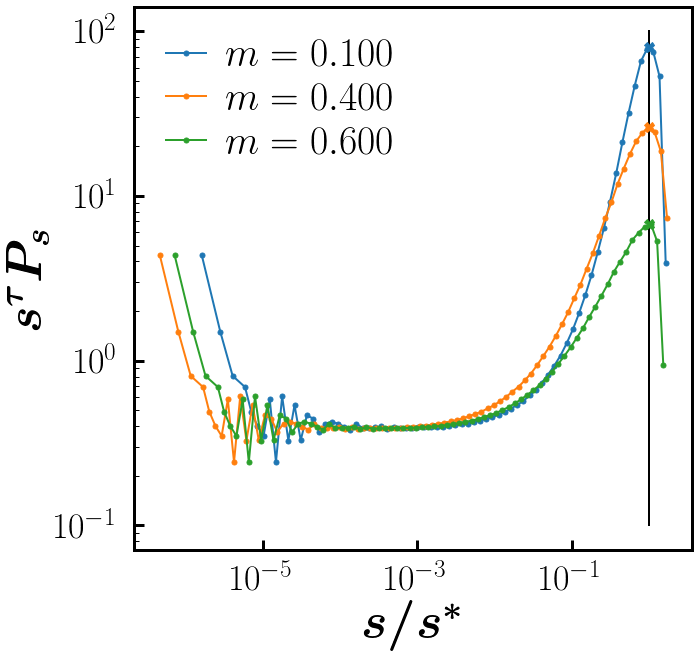

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_rasterized(True)

networkSize = 10240000
acceptanceThreshold = 0.5
current = networkSize, acceptanceThreshold
# tau = 2.05

def plotCSD_char(op):
    csd, dist = distLogBin(*clusterSizeDist[current, op], delta_exponent=0.08)
    dist *= np.power(csd, tau)
    csd /= char_size[op]
    color = next(ax._get_lines.prop_cycler)['color']
    ax.plot(csd, dist, 'o-', label=latex_string("m={:.3f}".format(op)), markersize=5, linewidth=2, color=color)
    ax.plot(1, char_dist[op], 'X', markersize=10, color=color)

ax.plot([1,1], [1e-1,1e2], 'k-', linewidth=2)
plotCSD_char(0.10)
plotCSD_char(0.40)
plotCSD_char(0.60)
# plotCSD_char(0.814)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latex_bold_string("s/s^*"))
ax.set_ylabel(latex_bold_string("s^\\tau P_s"))
# ax.set_xlim([1e-1,5])
# ax.set_ylim([50, 1e2])
ax.legend(loc='best')

# fig.savefig("../data/mBFW/fig/csd_char(N{:.1e},G{:.1f},tau{:.2f}).pdf".format(*current, tau), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
fig.show()

[  66911.70742926  133196.5686093   200178.28150998  268252.99764636
  331920.24125702  399004.8256575   469718.82357053  538802.38799998
  602448.88644623  671657.51124577  740346.66233886  812665.74863338
  879030.98260536  949033.9952846  1011575.30218853 1084416.81451422
 1153648.66231601 1209046.42055242 1286922.98422725 1357264.89239368
 1417050.42835252 1480932.02234342 1551008.0662739  1612433.98124786
 1668940.89145811 1712444.66550945 1770528.23478444 1833922.40303216
 1897209.04369071 1950110.1747857  1995545.95300937 2030834.89752587
 2067585.07841399 2103314.20673373 2170565.0595322  2211282.59183129
 2257146.9729965  2291884.87840196 2322804.81639285 2341953.58687665
 2353443.36594498 2367956.31258921 2369940.62539994]


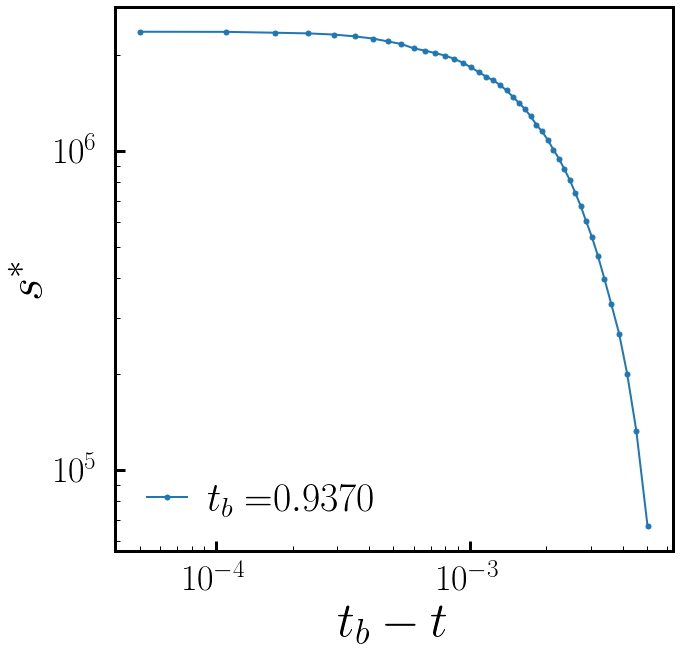

In [9]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

networkSize = 10240000
acceptanceThreshold = 0.5
current = networkSize, acceptanceThreshold
char = np.array(list(char_size.values()))
t_g = tList[np.argmax(char)+1]-1e-5
m_g = orderParameter[current][int(t_g*networkSize)]

def plotChar(t_g):
    reducedT = t_g-tList
    reduced_char = char[reducedT>0]
    reducedT = reducedT[reducedT>0]
    ax.plot(reducedT, reduced_char, 'o-', label=latex_string("t_b=") + latex_float(t_g,4), markersize=5, linewidth=2)
    print(reduced_char)

plotChar(t_g)

ax.legend(loc='best')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latex_string("t_b-t"))
ax.set_ylabel(latex_string("s^*"))

# fig.savefig("../data/mBFW/fig/reducedT_char(N{:.1e},G{:.1f}).pdf".format(*current), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
fig.show()

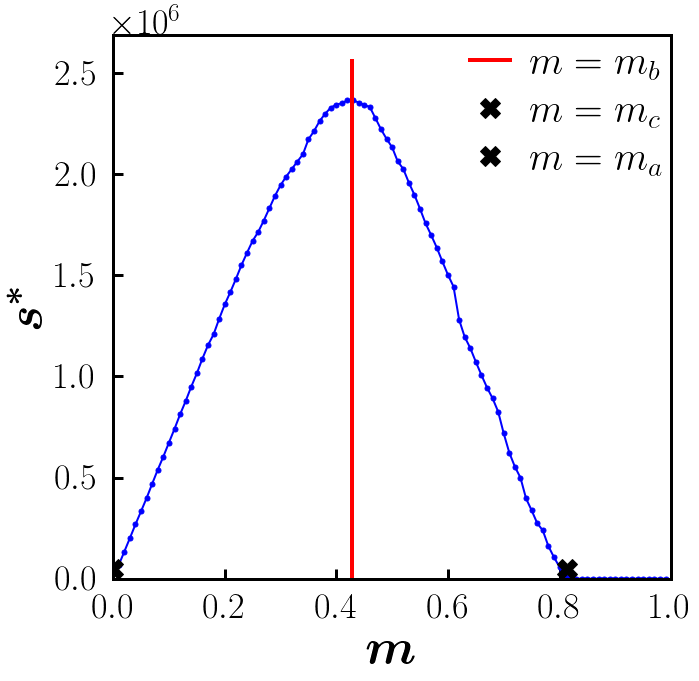

In [206]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

networkSize = 10240000
acceptanceThreshold = 0.5
current = networkSize, acceptanceThreshold

ax.plot(char_size.keys(), char_size.values(), 'bo-', markersize=5, linewidth=2)
ax.plot([m_g,m_g], [1, 0.25*networkSize], 'r-', label=latex_string("m=m_b"))
ax.plot(points[current]["m_c"], 5e4, 'kX', markersize=20, label=latex_string("m=m_c"))
ax.plot(points[current]["m_a"], 5e4, 'kX', markersize=20, label=latex_string("m=m_a"))

ax.set_xlabel(latex_bold_string("m"))
ax.set_ylabel(latex_bold_string("s^*"))
ax.legend(loc='best', borderpad=0.1, borderaxespad=0.1)
ax.set_xlim([0,1])
ax.set_ylim(bottom=0)

# fig.savefig("../data/mBFW/fig/m_char(N{:.1e},G{:.1f}).pdf".format(*current, tau), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)

fig.show()


In [144]:
networkSize = 20000
acceptanceThreshold = 0.9
current = networkSize, acceptanceThreshold
print(t_g, m_g)
# with open("../data/mBFW/points/" + "N{:.1e},G{:.1f}".format(*current) + ".txt", 'a') as file:
#     file.write("t_g: " + str(t_g) + "\n")
#     file.write("m_g: " + str(m_g) + "\n")



0.70809 0.16915


# Find t_a, m_a, sigma'

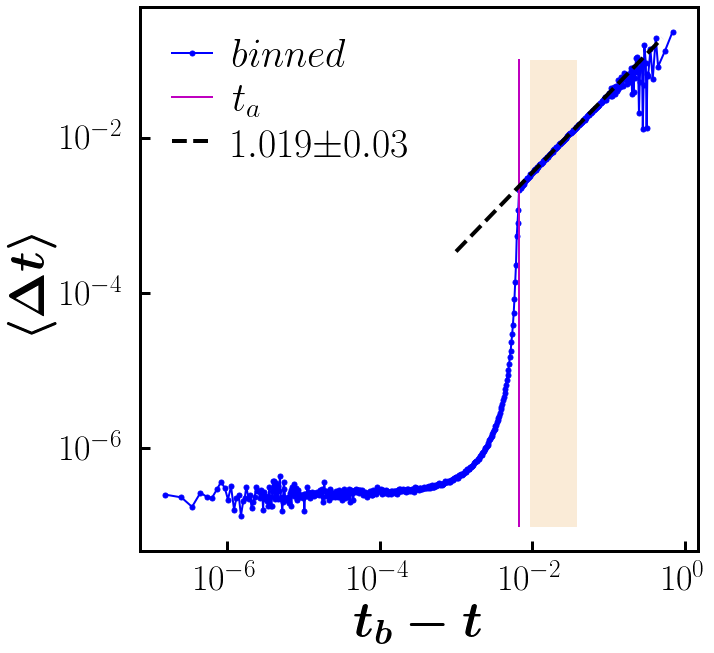

In [12]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

networkSize = 10240000
acceptanceThreshold = 0.5
current = networkSize, acceptanceThreshold
fitRange = np.array([-40,-25])
delta_exponent = 0.01
t_a = 0.9303
m_a = orderParameter[current][int(t_a*networkSize)]

t, iet = interEventTime[current]
reducedT = t_g*networkSize-t
reducedT, iet = avgLogBin(reducedT[reducedT>0], iet[reducedT>0], delta_exponent=delta_exponent)
reducedT /= networkSize
iet /= networkSize
ax.plot(reducedT, iet, 'bo-', markersize=5, linewidth=2, label=latex_string("binned"))
ax.plot([t_g-t_a, t_g-t_a], [1e-7, 1e-1], 'm-', linewidth=2, label=latex_string("t_a"))
fitRange *= int(0.04/delta_exponent)
fitX, fitY, alpha, _ = logFit(reducedT[fitRange[0]:fitRange[1]], iet[fitRange[0]:fitRange[1]], offset=-0.0, start = 1e-3, end=5e-1)
ax.plot(fitX, fitY, 'k--', label=latex_float(alpha, 3) + latex_string("\pm 0.03"))
ax.fill_betweenx([1e-7, 1e-1], [reducedT[fitRange[0]], reducedT[fitRange[0]]], [reducedT[fitRange[1]], reducedT[fitRange[1]]], color='antiquewhite')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latex_bold_string("t_b-t"))
ax.set_ylabel(latex_bold_string("\langle \\Delta t \\rangle"))
# ax.set_xlim([1e-3, 1e-1])
# ax.set_ylim([1e-6, 1e-1])
ax.legend(loc='best')

# fig.savefig("../data/mBFW/fig/reducedT_iet(N{:.1e},G{:.1f})_zoomed.pdf".format(*current), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
fig.show()


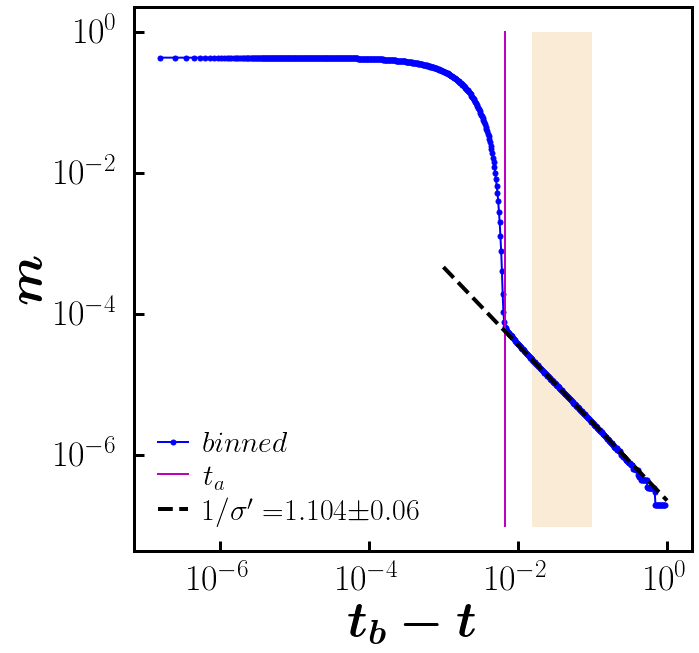

In [20]:
fig, ax = plt.subplots()
ax.set_rasterized(True)
networkSize = 10240000
acceptanceThreshold = 0.5
current = networkSize, acceptanceThreshold
fitRange = np.array([-45, -25])
delta_exponent = 0.01
t_a = 0.9303
m_a = orderParameter[current][int(t_a*networkSize)]

reducedT = t_g * networkSize - time[networkSize] * networkSize
reducedT, op = avgLogBin(reducedT[reducedT > 0], orderParameter[current][reducedT > 0], delta_exponent=delta_exponent)
reducedT /= networkSize
ax.plot(reducedT, op, 'bo-', label=latex_string("binned"), markersize=5, linewidth=2)
ax.plot([t_g - t_a, t_g - t_a], [1/networkSize, 1], 'm-', label=latex_string("t_a"), linewidth=2)
fitRange *= int(0.04/delta_exponent)
fitX, fitY, alpha, _ = logFit(reducedT[fitRange[0]:fitRange[1]], op[fitRange[0]:fitRange[1]], offset=0.0, start=1e-3, end=1)
ax.plot(fitX, fitY, 'k--', label=latex_string("1/\sigma'=") + latex_float(-alpha, 3) + latex_string("\pm 0.06"))
ax.fill_betweenx([1, 1/networkSize], [reducedT[fitRange[0]], reducedT[fitRange[0]]], [reducedT[fitRange[1]], reducedT[fitRange[1]]], color='antiquewhite')


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latex_bold_string("t_b-t"))
ax.set_ylabel(latex_bold_string("m"))
# ax.set_xlim([1e-3, 1e-1])
# ax.set_ylim([1e-6, 1e-0])
ax.legend(loc="best", fontsize=30)

# fig.savefig("../data/mBFW/fig/reducedT_op(N{:.1e},G{:.1f})_zoomed.pdf".format(*current), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
plt.show()


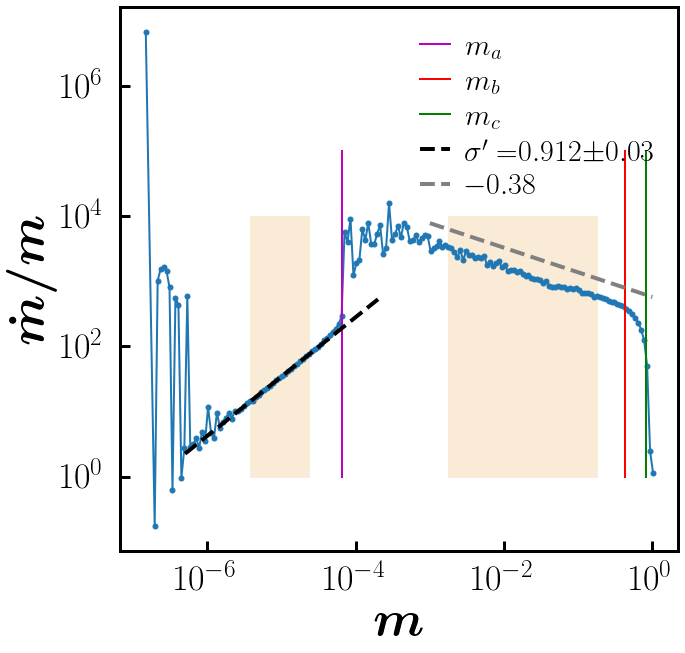

In [100]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

def plotDotOP(networkSize, acceptanceThreshold, fit=True):
    current = networkSize, acceptanceThreshold
    op = orderParameter[current] * networkSize
    dot_op = (op[1:] - op[:-1]) * networkSize
    op = (op[1:] + op[:-1]) / 2.0
    x, y = avgLogBin(op, dot_op / op, delta_exponent=0.04)
    x /= networkSize
    ax.plot(x, y, 'o-', markersize=5, linewidth=2)

    if fit:
        points = rd.readPoints(*current)
        ax.plot([points["m_a"], points["m_a"]], [1,1e5], 'm-', linewidth=2, label=latex_string("m_a"))
        # ax.plot([m_a,m_a], [1,1e5], 'm-', linewidth=2, label=latex_string("m_a"))
        ax.plot([points["m_g"], points["m_g"]], [1,1e5], 'r-', linewidth=2, label=latex_string("m_b"))
        ax.plot([points["m_c"], points["m_c"]], [1,1e5], 'g-', linewidth=2, label=latex_string("m_c"))
        fitRange1 = 33,53
        fitRange2 = -70, -20
        fitX1, fitY1, alpha1, _ = logFit(x[fitRange1[0]:fitRange1[1]], y[fitRange1[0]:fitRange1[1]], offset=0.0, start=5e-7, end=2e-4)
        ax.plot(fitX1, fitY1, 'k--', label=latex_string("\sigma'=") + latex_float(alpha1, 3) + latex_string("\pm 0.03"))
        ax.fill_betweenx([1, 1e4], [x[fitRange1[0]], x[fitRange1[0]]], [x[fitRange1[1]], x[fitRange1[1]]], color='antiquewhite')
        fitX2, fitY2, alpha2, _ = logFit(x[fitRange2[0]:fitRange2[1]], y[fitRange2[0]:fitRange2[1]], offset=-0.3, start=1e-3, end=1)
        ax.plot(fitX2, fitY2, '--', color='grey', label=latex_float(alpha2, 2))
        ax.fill_betweenx([1, 1e4], [x[fitRange2[0]], x[fitRange2[0]]], [x[fitRange2[1]], x[fitRange2[1]]], color='antiquewhite')

plotDotOP(10240000, 0.5)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latex_bold_string("m"))
ax.set_ylabel(latex_bold_string("\dot{m} / m"))
ax.legend(loc='best', fontsize=30)

# fig.savefig("../data/mBFW/fig/dotOP(N{:.1e},G{:.1f}).pdf".format(*current), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
plt.show()


In [ ]:
networkSize = 10240000
acceptanceThreshold = 0.2
current = networkSize, acceptanceThreshold
points = rd.readPoints(*current)

reducedT = points["t_g"] * networkSize - time[networkSize] * networkSize
reducedT, op = avgLogBin(reducedT[reducedT > 0], orderParameter[current][reducedT > 0], delta_exponent=0.04)
reducedT /= networkSize
for fit in range(-48, -9):
    _, _, sigma_inverse, _ = logFit(reducedT[-50:fit], op[-50:fit])
    print(-sigma_inverse, end="\t")
print("-----")

op = orderParameter[current] * networkSize
dot_op = (op[1:] - op[:-1]) * networkSize
op = (op[1:] + op[:-1]) / 2.0
x, y = avgLogBin(op, dot_op / op, delta_exponent=0.04)
x /= networkSize
for fit in range(30, 58):
    _, _, sigma, _ = logFit(x[fit: 60], y[fit:60])
    print(sigma, end="\t")

In [156]:
networkSize = 20000
acceptanceThreshold = 0.9
current = networkSize, acceptanceThreshold
print(t_a, m_a)
with open("../data/mBFW/points/" + "N{:.1e},G{:.1f}".format(*current) + ".txt", 'a') as file:
    file.write("t_a: " + str(t_a) + "\n")
    file.write("m_a: " + str(m_a) + "\n")

0.6925 0.0185314


# Distributions

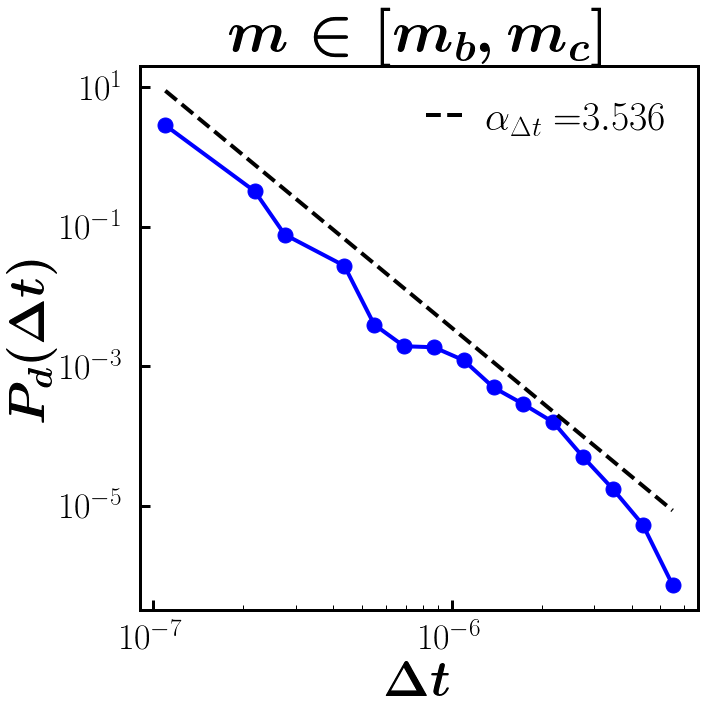

In [146]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

networkSize = 10240000
acceptanceThreshold = 0.5
target_state = "GC"

def plotIETDist(networkSize, acceptanceThreshold, target_state, fit=False):
    current = networkSize, acceptanceThreshold
    sub_states = rd.getSubState(target_state)
    iet_dist = {}
    for state in sub_states:
        for t,d in zip(interEventTimeDist[current, state][0], interEventTimeDist[current, state][1]):
            if t in iet_dist:
                iet_dist[t] += d
            else:
                iet_dist[t] = d
    iet, dist = distLogBin(np.array(list(iet_dist.keys())), np.array(list(iet_dist.values())))
    # ax.plot(iet, dist, 'bo-', markersize=5, linewidth=2)
    iet /= networkSize
    ax.plot(iet, dist, 'bo-')
    if fit:
        if target_state == "0A":
            fitX, fitY, alpha, _ = logFit(iet[-17:-7], dist[-17:-7], offset=-0.5)
            ax.plot(fitX, fitY, '--', color='grey', label=latex_string("\\alpha_{\\Delta t2}=") + latex_float(-alpha, 3))
            fitX, fitY, alpha, _ = logFit(iet[10:30], dist[10:30], offset=-0.5)
        elif target_state[0] == "0" or "A" in target_state:
            # fitX, fitY, alpha, _ = logFit(iet[30:-8], dist[30:-8], offset=-0.5, start=1e-6, end=1e-1)
            fitX, fitY, alpha, _ = logFit(iet[30:-8], dist[30:-8], offset=-0.5)
        else:
            fitX, fitY, alpha, _ = logFit(iet[:], dist[:], offset=-0.5)
        ax.plot(fitX, fitY, 'k--', label=latex_string("\\alpha_{\\Delta t}=") + latex_float(-alpha, 3))

plotIETDist(networkSize, acceptanceThreshold, target_state, fit=True)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latex_bold_string("\\Delta t"))
ax.set_ylabel(latex_bold_string("P_d(\\Delta t)"))
ax.legend(loc='upper right')
ax.set_title(latex_bold_string("m \in [m_b, m_c]"))

# fig.savefig("../data/mBFW/fig/ietDist(N{:.1e},G{:.1f})_".format(*current) + target_state + ".pdf", bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
fig.show()


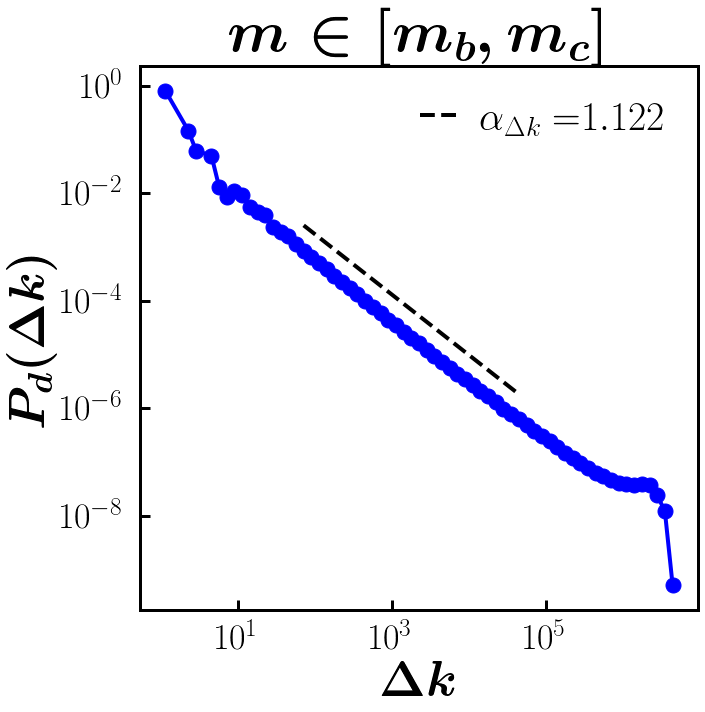

In [183]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

networkSize = 10240000
acceptanceThreshold = 0.5
current = networkSize, acceptanceThreshold
target_state = "GC"

def plotDKDist(networkSize, acceptanceThreshold, target_state, fit=False):
    current = networkSize, acceptanceThreshold
    sub_states = rd.getSubState(target_state)
    dk_dist = {}
    for state in sub_states:
        for dk,d in zip(deltaUpperBoundDist[current, state][0], deltaUpperBoundDist[current, state][1]):
            if dk in dk_dist:
                dk_dist[dk] += d
            else:
                dk_dist[dk] = d
    dk, dist = distLogBin(np.array(list(dk_dist.keys())), np.array(list(dk_dist.values())))
    # ax.plot(dk, dist, 'bo-', markersize=5, linewidth=2)
    ax.plot(dk, dist, 'bo-')
    if fit:
        if target_state == "01" or target_state == "A1":
            fitX, fitY, alpha, _ = logFit(dk[-23:-3], dist[-23:-3], offset=-0.5)
            ax.plot(fitX, fitY, '--', color='grey', label=latex_string("\\alpha_{\\Delta k2}=") + latex_float(-alpha, 3))
            fitX, fitY, alpha, _ = logFit(dk[10:30], dist[10:30], offset=-0.5)
        elif target_state[0] == "0":
            fitX, fitY, alpha, _ = logFit(dk[15:-10], dist[15:-10], offset=-0.5)
        elif target_state[0] == "A":
            fitX, fitY, alpha, _ = logFit(dk[-30:-3], dist[-30:-3], offset=-0.5)
        elif target_state[0] == "G" or target_state == "C1":
            fitX, fitY, alpha, _ = logFit(dk[15:-20], dist[15:-20], offset=-0.5)
        ax.plot(fitX, fitY, 'k--', label=latex_string("\\alpha_{\\Delta k}=") + latex_float(-alpha, 3))

plotDKDist(networkSize, acceptanceThreshold, target_state, True)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latex_bold_string("\\Delta k"))
ax.set_ylabel(latex_bold_string("P_d(\\Delta k)"))
ax.legend(loc='upper right')
# ax.set_title(latex_bold_string("m \in [0, m_b]"))
# ax.set_title(latex_bold_string("m \in [0, m_c]"))
ax.set_title(latex_bold_string("m \in [m_b, m_c]"))
# ax.set_title(latex_bold_string("m \in [m_c, 1]"))

fig.savefig("../data/mBFW/fig/deltaKDist(N{:.1e},G{:.1f})_".format(*current) + target_state + ".pdf", bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
fig.show()


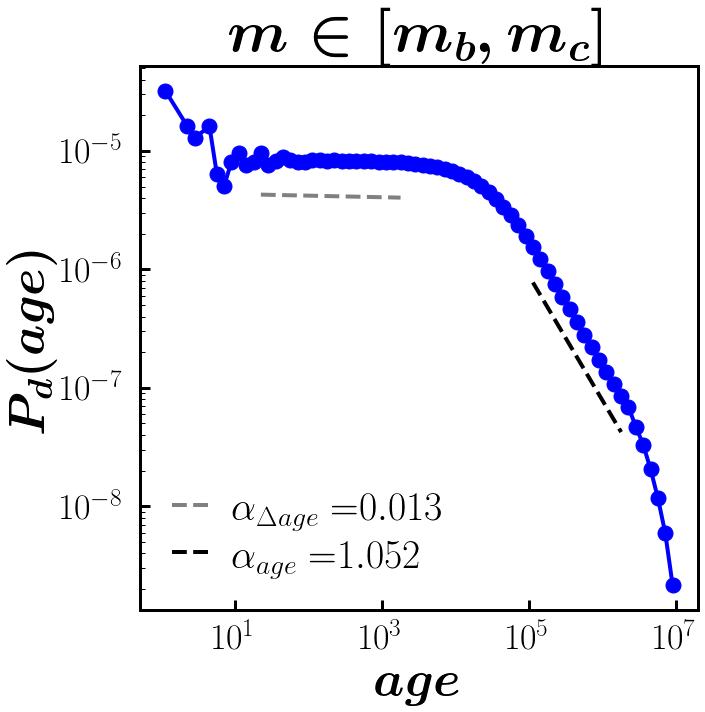

In [13]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

networkSize = 10240000
acceptanceThreshold = 0.5
current = networkSize, acceptanceThreshold

target_state = "0A"

def plotAgeDist(networkSize, acceptanceThreshold, targett20e, fit=False):
    current = networkSize, acceptanceThreshold
    sub_states = rd.getSubState(target_state)
    age = time[networkSize] * networkSize
    dist = np.zeros_like(age)
    for state in sub_states:
        dist += ageDist[current, state]
    age, dist = distLogBin(age, dist)
    # ax.plot(age, dist, 'bo-', markersize=5, linewidth=2)
    ax.plot(age, dist, 'bo-')
    if fit:
        if target_state == "0A":
            fitX, fitY, alpha, _ = logFit(age[10:30], dist[10:30], offset=0.3)
            ax.plot(fitX, fitY, '--', color='grey', label=latex_string("\\alpha_{\\Delta age}=") + latex_float(-alpha, 3))
            fitX, fitY, alpha, _ = logFit(age[-20:-7], dist[-20:-7], offset=0.3)
        elif target_state[0] == "0" or target_state[0] == "G" or target_state == "C1":
            # fitX, fitY, alpha, _ = logFit(age[22:-15], dist[22:-15], offset=-0.5)
            fitX, fitY, alpha, _ = logFit(age[22:-15], dist[22:-15], offset=-1.0, start=10, end=3e6)
        elif target_state[0] == "A":
            fitX, fitY, alpha, _ = logFit(age[10:30], dist[10:30], offset=0.5)
            ax.plot(fitX, fitY, '--', color='grey', label=latex_string("\\alpha_{\\Delta age}=") + latex_float(-alpha, 3))
            fitX, fitY, alpha, _ = logFit(age[-20:-3], dist[-20:-3], offset=0.3)
        else:
            fitX, fitY, alpha, _ = logFit(age, dist, offset=-0.5)
        ax.plot(fitX, fitY, 'k--', label=latex_string("\\alpha_{age}=") + latex_float(-alpha, 3))

plotAgeDist(networkSize, acceptanceThreshold, target_state, fit=True)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latex_bold_string("age"))
ax.set_ylabel(latex_bold_string("P_d(age)"))
ax.legend(loc='best')
ax.set_title(latex_bold_string("m \in [m_b, m_c]"))

# fig.savefig("../data/mBFW/fig/ageDist(N{:.1e},G{:.1f})_".format(*current) + target_state + ".pdf", bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
fig.show()


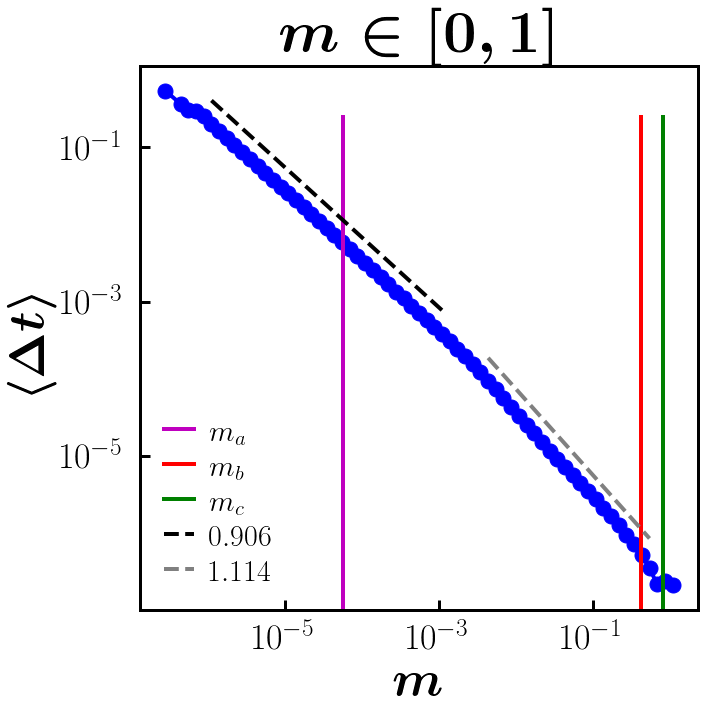

In [227]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_rasterized(True)

networkSize = 10240000
acceptanceThreshold = 0.5
current = networkSize, acceptanceThreshold
m_g = points[current]["m_g"]
m_c = points[current]["m_c"]
m_a = orderParameter[current][int((points[current]["t_c"]-0.01)*networkSize)]

k, iet = avgLogBin(*upperBound_interEventTime_tot[current])
k /= networkSize
iet /= networkSize

ax.plot(k, iet, 'bo-')
ax.plot([m_a, m_a], [0, 0.25], 'm-', label=latex_string("m_a"))
ax.plot([m_g, m_g], [0, 0.25], 'r-', label=latex_string("m_b"))
ax.plot([m_c, m_c], [0, 0.25], 'g-', label=latex_string("m_c"))

fitX, fitY, alpha, _ = logFit(k[5:-30], iet[5:-30], offset=-0.3)
ax.plot(fitX, fitY, 'k--', label=latex_float(-alpha, 3))
fitX, fitY, alpha, _ = logFit(k[-25:-3], iet[-25:-3], offset=-0.3)
ax.plot(fitX, fitY, '--', color='grey', label=latex_float(-alpha, 3))

ax.set_xlabel(latex_bold_string("m"))
ax.set_ylabel(latex_bold_string("\langle \\Delta t \\rangle"))
ax.legend(loc='best', fontsize=30)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title(latex_bold_string("m \in [0,1]"))

# fig.savefig("../data/mBFW/fig/m_iet(N{:.1e},G{:.1f}).pdf".format(*current), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
plt.show()


In [226]:
tau = 2.3
sigma = 0.81
alpha = 0.91
delta = 0.86

print(1+(3-tau-sigma)/(delta * sigma), alpha)

0.8420901521676717 0.91


# Location of each points

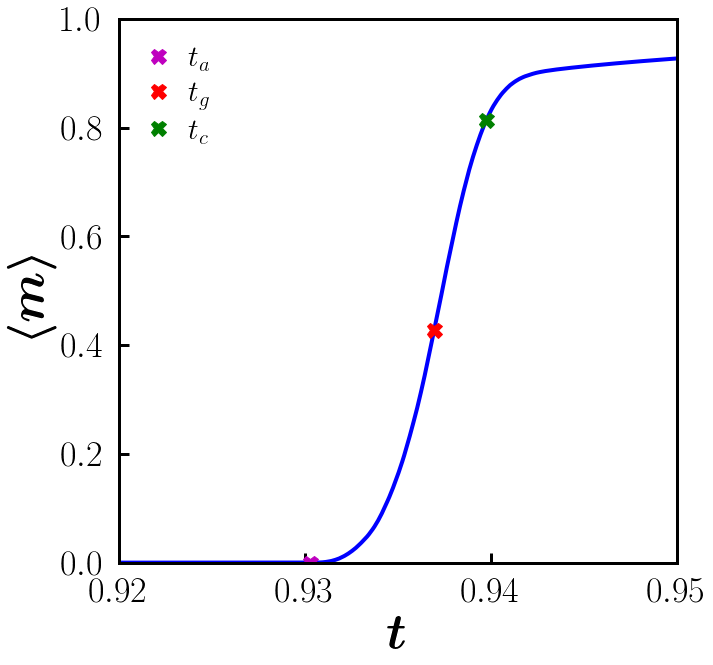

In [106]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

networkSize = 10240000
acceptanceThreshold = 0.5
current = networkSize, acceptanceThreshold

t, op = avgLinBin(time[networkSize], orderParameter[current])
ax.plot(t, op, 'b-')
points = rd.readPoints(*current)
ax.plot(points["t_a"], points["m_a"], 'mX', label=latex_string("t_a"))
ax.plot(points["t_g"], points["m_g"], 'rX', label=latex_string("t_g"))
ax.plot(points["t_c"], points["m_c"], 'gX', label=latex_string("t_c"))

# temp = 0.934
# ax.plot(temp, orderParameter[current][int(temp*networkSize)], 'mX')

ax.set_xlim(chi_plotRange[acceptanceThreshold])
ax.set_ylim([0, 1])
ax.set_xlabel(latex_bold_string("t"))
ax.set_ylabel(latex_bold_string("\langle m \\rangle"))
ax.legend(loc="upper left", fontsize=30)

# fig.savefig("../data/mBFW/fig/t_op(N{:.1e},G{:.1f}).pdf".format(*current), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
plt.show()


In [4]:

def find_inflection_ta(networkSize, orderParameter):
    time = np.arange(0.0, 1.0, 1/networkSize)
    # delta = (time[1] - time[0]) * 10
    delta = 1e-4
    bin_t, bin_op = avgLinBin(time, orderParameter, delta=delta)
    # max_inclination = 0.0
    inclination = (bin_op[1:] - bin_op[:-1]) / delta
    inflection_index = np.argmax(inclination)
    max_inclination = inclination[inflection_index]
    inflection_t = bin_t[inflection_index]
    inflection_op = bin_op[inflection_index]
    inflection_ta = inflection_t-(inflection_op/max_inclination)
    inflection_ma = orderParameter[int(inflection_ta * networkSize)]
    return inflection_ta, inflection_ma, inflection_t, inflection_op

0.9805043965465464 0.1389003056315184 0.98355 0.5736352655322463


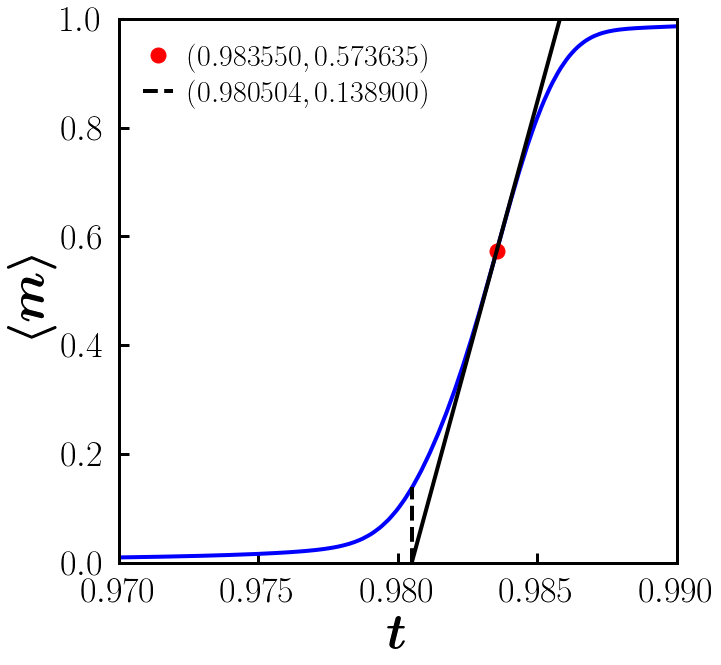

In [9]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

networkSize = 20000
acceptanceThreshold = 0.3
current = networkSize, acceptanceThreshold

t, op = avgLinBin(time[networkSize], orderParameter[current])
ax.plot(t, op, 'b-')
ta, ma, inf_t, inf_m = rd.find_inflection_ta(networkSize, orderParameter[current])
ax.plot(inf_t, inf_m, 'ro', label=latex_string("({:.6f},{:.6f})".format(inf_t, inf_m)))
a = inf_m/(inf_t-ta)
ax.plot([ta, inf_t + (1-inf_m)/a], [0, 1], 'k-')
ax.plot([ta,ta], [0, ma], 'k--', label=latex_string("({:.6f},{:.6f})".format(ta, ma)))


print(ta,ma,inf_t, inf_m)
with open("../data/mBFW/points/" + "N{:.1e},G{:.1f}".format(*current) + ".txt", 'a') as file:
    file.write("inf_ta: " + str(ta) + "\n")
    file.write("inf_ma: " + str(ma) + "\n")
    file.write("inflection_t: " + str(inf_t) + "\n")
    file.write("inflection_m: " + str(inf_m) + "\n")


ax.set_xlim(chi_plotRange[acceptanceThreshold])
ax.set_ylim([0, 1])
ax.set_xlabel(latex_bold_string("t"))
ax.set_ylabel(latex_bold_string("\langle m \\rangle"))
ax.legend(loc="upper left", fontsize=30)

# fig.savefig("../data/mBFW/fig/t_op(N{:.1e},G{:.1f}).pdf".format(*current), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w', dpi=100)
plt.show()


# Discontinuous Jump: order parameter distribution

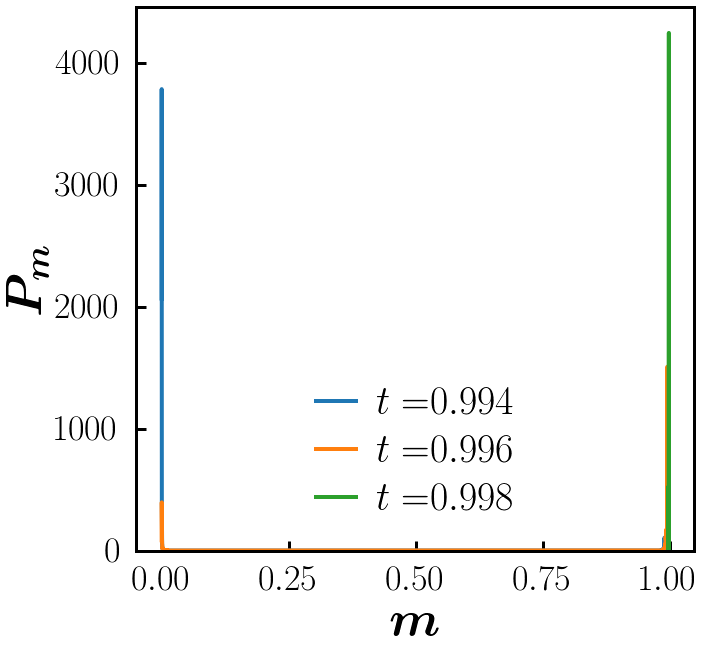

In [138]:
fig, ax = plt.subplots()
ax.set_rasterized(True)

networkSize = 10240000
acceptanceThreshold = 0.2
current = networkSize, acceptanceThreshold

def plotOPD(t):
    op, dist = orderParameterDist[current, t]
    op, dist = distLinBin(op/networkSize, dist)
    ax.plot(op, dist, label=latex_string("t=") + latex_float(t, 3))

plotOPD(0.994)
# plotOPD(0.995)
plotOPD(0.996)
# plotOPD(0.997)
plotOPD(0.998)

ax.legend(loc="best")
ax.set_xlabel(latex_bold_string("m"))
ax.set_ylabel(latex_bold_string("P_m"))
# ax.set_xlim([0.0, 1.0])
ax.set_ylim(bottom=0)

# fig.savefig("../data/mBFW/fig/orderParameterDist(N{:.1e},G{:.1f}).pdf".format(*current), bbox_inches = 'tight', pad_inches = 0.1, facecolor = 'w')
plt.show()
